In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Kekw").getOrCreate()

In [2]:
# Klasyfkiacja Forest Type
# Random Forest Classifier
# DecisionTreeClassifier
# Korelacja 
# Standaryzacje
# Boxplot, describe, usuwanie/uzupelnianie nulli/nan
# Wybranie kolumn?
# Scory
# Sprawko

In [90]:
df = spark.read.format("csv").option("inferSchema", "true").option("header", "true").option("index", "true").load("covtype.data")

In [91]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
cols = []
for i in df.columns:
    try:
        int(i)
    except:
        cols.append(i)
vassembler = VectorAssembler(inputCols=cols, outputCol="Vec")
df2 = vassembler.transform(df)
df3 = StandardScaler(inputCol="Vec", outputCol="Scaled", withStd=True, withMean=True).fit(df2).transform(df2)
df3.show(2,truncate=False)

+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+--------+---------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|1  |2  |3  |4  |2702|2703|2704|2705|2706|2717|3501|3502|4201|4703|4704|4744|4758|5101|5151|6101|6

<AxesSubplot:>

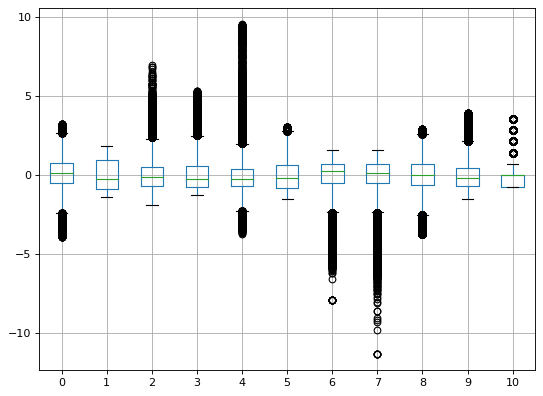

In [92]:
import pandas
from matplotlib.pyplot import figure
data = df3.select("scaled").toPandas()
data = pandas.DataFrame(data["scaled"].to_list())
figure(figsize=(8, 6), dpi=80)
data.boxplot()
#TODO Nazwy kolumn

C:\Users\Karol\AppData\Local\Temp/ipykernel_8188/9070871.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=figure(figsize=(8, 6), dpi=80))


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>, <AxesSubplot:>]],
      dtype=object)

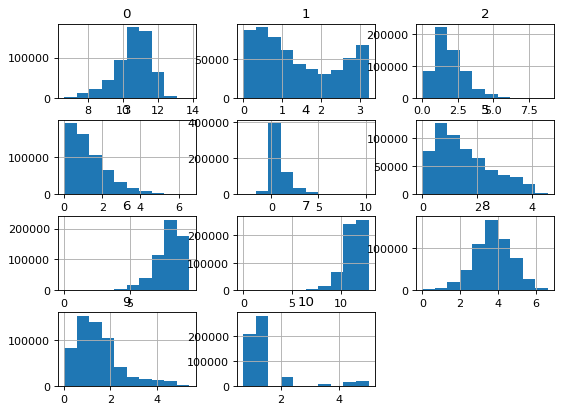

In [6]:
data.hist(ax=figure(figsize=(8, 6), dpi=80))

In [7]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,-0.269554
1,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,0.017080
2,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,0.148285
3,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.020317
4,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,0.081664
5,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,-0.153450
6,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,-0.035415
7,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,-0.096426
8,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,-0.048290
9,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,-0.108936


In [40]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05
mean,4.483200e-15,-1.072665e-15,9.877441e-16,1.521533e-15,1.369693e-15,-1.499618e-15,-1.332046e-14,-2.588915e-15,3.559636e-15,-6.198838e-16,7.670279e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.930090e+00,-1.390864e+00,-1.883447e+00,-1.267603e+00,-3.763925e+00,-1.507224e+00,-7.924801e+00,-1.129658e+01,-3.723841e+00,-1.495468e+00,-7.529304e-01
25%,-5.370482e-01,-8.726080e-01,-6.815623e-01,-7.594858e-01,-6.761935e-01,-7.979110e-01,-5.284314e-01,-5.219725e-01,-6.147238e-01,-7.221679e-01,-7.529304e-01
50%,1.308453e-01,-2.560616e-01,-1.473915e-01,-2.419589e-01,-2.816501e-01,-2.264842e-01,2.186767e-01,1.356328e-01,1.232510e-02,-2.041174e-01,-3.685670e-02
75%,7.273064e-01,9.323539e-01,5.203219e-01,5.390361e-01,3.873583e-01,6.271286e-01,7.042970e-01,6.920681e-01,6.655010e-01,4.302302e-01,-3.685670e-02
max,3.209585e+00,1.825899e+00,6.930371e+00,5.304988e+00,9.513319e+00,3.057135e+00,1.563471e+00,1.552013e+00,2.912426e+00,3.921407e+00,3.543512e+00


In [68]:
s = set()
for i in data:
    for j, logic in enumerate(abs(data[i]) > 3):
        if logic:
            s.add(j)

print(s)  

{0, 262145, 262146, 262147, 262148, 262149, 262150, 262151, 262152, 262153, 262154, 262155, 1, 2, 5, 6, 3, 8, 9, 10, 12, 4, 13, 16, 22, 262169, 262170, 262171, 262172, 262173, 262174, 262175, 262176, 262177, 524322, 524323, 524324, 524325, 524326, 524327, 524328, 524329, 524330, 262178, 262179, 524333, 524334, 262191, 524335, 524336, 524337, 524338, 524339, 524340, 262192, 262193, 262199, 262200, 262201, 262203, 262204, 262205, 262206, 262202, 55, 262209, 62, 262212, 262213, 262214, 68, 543936, 262217, 262218, 262219, 78, 80, 81, 262226, 262227, 262231, 262232, 262233, 262234, 262235, 262236, 262237, 262238, 262239, 262240, 262241, 262242, 131171, 262243, 262244, 262245, 262247, 262248, 262249, 262250, 262251, 262252, 262253, 262246, 262255, 393328, 393329, 393330, 393331, 393332, 393333, 393334, 393335, 393336, 393337, 393338, 393339, 393340, 393341, 393342, 393343, 393344, 393345, 393346, 393347, 393348, 393349, 393350, 393351, 393352, 393353, 393354, 393355, 262284, 262285, 262286, 

In [101]:
df3.filter(df3["Elevation"] > 2597)

+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+--------+--------------------+--------------------+
|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|  1|  2|  3|  4|2702|2703|2704|2705|2706|2717|3501|3502|4201|4703|4704|4744|4758|5101|5151|6101|6102|6731|7101|7102|7103|7201|7202|7700|7701|7702|7709|7710|7745|7746|7755|7756|7757|7790|8703|8707|8708|8771|8772|8776|SoilType|                 Vec|              Scaled|
+---------+------+-----+--------------------------------+-----------

In [105]:
from pyspark.sql.functions import monotonically_increasing_id 
df_index = df3.select("*").withColumn("id", monotonically_increasing_id())

In [142]:
df4 = df_index.filter(~df_index.id.isin(s))

In [144]:
df4.select("id").show()

+---+
| id|
+---+
| 11|
| 14|
| 15|
| 17|
| 18|
| 19|
| 20|
| 21|
| 23|
| 24|
| 25|
| 26|
| 27|
| 28|
| 31|
| 32|
| 33|
| 34|
| 35|
| 37|
+---+
only showing top 20 rows



In [148]:
s

AttributeError: 'set' object has no attribute 'get'